In [2]:
from nrclex import NRCLex
import pandas as pd
import numpy as np

In [67]:

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('final.csv')
df['Tweets'] = df['Tweets'].astype(str)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df

,Tweets,Date,country,compound,Sentiment,month,Country/Region
0,These chinese people on campus are so consider...,2020-01-28,afghanistan,0.5777,positive,1,Afghanistan
1,So the first month of the new decade went some...,2020-01-30,albania,0.2732,positive,1,Albania
2,Coronavirus sounds nice and all but I'm actual...,2020-01-30,albania,0.2263,positive,1,Albania
3,Also a good compendium of information on #nCoV...,2020-01-22,albania,0.4404,positive,1,Albania
4,OMG I WAS JUST\r\n\r\nearlier today I was expl...,2020-01-21,albania,0.9042,positive,1,Albania
...,...,...,...,...,...,...,...
165111,"One, so you're saying people only have the rig...",2020-06-19,us,0.4490,positive,6,US
165112,Kolkata Private hospitals face shortage of bed...,2020-06-19,india,-0.1372,negative,6,India
165113,Reminder: Drive-thru testing is offered at the...,2020-06-19,us,0.5106,positive,6,US
165114,All Trump supporters should be excited to atte...,2020-06-19,us,0.6486,positive,6,US


In [6]:
def emotion2(text):
    text_object = NRCLex(text)
    emotions = text_object.raw_emotion_scores
    return emotions

In [7]:
df['raw emotion scores'] =  df['Tweets'].apply(lambda x: emotion2(x))

In [8]:
df

,Tweets,Date,country,compound,Sentiment,month,Country/Region,raw emotion scores
0,These chinese people on campus are so consider...,2020-01-28,afghanistan,0.5777,positive,1,Afghanistan,"{'anticip': 3, 'positive': 4, 'negative': 4, '..."
1,So the first month of the new decade went some...,2020-01-30,albania,0.2732,positive,1,Albania,"{'anticip': 7, 'positive': 8, 'negative': 6, '..."
2,Coronavirus sounds nice and all but I'm actual...,2020-01-30,albania,0.2263,positive,1,Albania,"{'anticip': 4, 'positive': 5, 'negative': 4, '..."
3,Also a good compendium of information on #nCoV...,2020-01-22,albania,0.4404,positive,1,Albania,"{'anticip': 3, 'positive': 3, 'negative': 3, '..."
4,OMG I WAS JUST\r\n\r\nearlier today I was expl...,2020-01-21,albania,0.9042,positive,1,Albania,"{'anticip': 13, 'positive': 14, 'negative': 12..."
...,...,...,...,...,...,...,...,...
165111,"One, so you're saying people only have the rig...",2020-06-19,us,0.4490,positive,6,US,"{'anticip': 9, 'positive': 10, 'negative': 12,..."
165112,Kolkata Private hospitals face shortage of bed...,2020-06-19,india,-0.1372,negative,6,India,"{'anticip': 3, 'positive': 4, 'negative': 4, '..."
165113,Reminder: Drive-thru testing is offered at the...,2020-06-19,us,0.5106,positive,6,US,"{'anticip': 7, 'positive': 8, 'negative': 9, '..."
165114,All Trump supporters should be excited to atte...,2020-06-19,us,0.6486,positive,6,US,"{'trust': 3, 'anticip': 2, 'positive': 2, 'neg..."


In [9]:
df =  pd.concat([df.drop(['raw emotion scores'], axis=1), df['raw emotion scores'].apply(pd.Series)], axis=1)

In [10]:
df['sum'] = df.iloc[:,6:].sum(1)

In [11]:
df

,Tweets,Date,country,compound,Sentiment,month,Country/Region,anticip,positive,negative,sadness,disgust,joy,anger,surprise,fear,trust,sum
0,These chinese people on campus are so consider...,2020-01-28,afghanistan,0.5777,positive,1,Afghanistan,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,5.0,37.0
1,So the first month of the new decade went some...,2020-01-30,albania,0.2732,positive,1,Albania,7.0,8.0,6.0,6.0,6.0,8.0,7.0,7.0,7.0,6.0,68.0
2,Coronavirus sounds nice and all but I'm actual...,2020-01-30,albania,0.2263,positive,1,Albania,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,42.0
3,Also a good compendium of information on #nCoV...,2020-01-22,albania,0.4404,positive,1,Albania,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,4.0,25.0
4,OMG I WAS JUST\r\n\r\nearlier today I was expl...,2020-01-21,albania,0.9042,positive,1,Albania,13.0,14.0,12.0,11.0,11.0,13.0,12.0,12.0,12.0,12.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165111,"One, so you're saying people only have the rig...",2020-06-19,us,0.4490,positive,6,US,9.0,10.0,12.0,11.0,11.0,9.0,11.0,10.0,11.0,12.0,106.0
165112,Kolkata Private hospitals face shortage of bed...,2020-06-19,india,-0.1372,negative,6,India,3.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,35.0
165113,Reminder: Drive-thru testing is offered at the...,2020-06-19,us,0.5106,positive,6,US,7.0,8.0,9.0,8.0,7.0,7.0,8.0,7.0,8.0,8.0,77.0
165114,All Trump supporters should be excited to atte...,2020-06-19,us,0.6486,positive,6,US,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,19.0


In [12]:
df['score_anticip'] = df['anticip']/df['sum']
df['score_positive'] = df['positive']/df['sum']
df['score_negative'] = df['negative']/df['sum']
df['score_surprise'] = df['surprise']/df['sum']
df['score_anger'] = df['anger']/df['sum']
df['score_disgust'] = df['disgust']/df['sum']
df['score_sadness'] = df['sadness']/df['sum']
df['score_joy'] = df['joy']/df['sum']
df['score_fear'] = df['fear']/df['sum']
df['score_trust'] = df['trust']/df['sum']

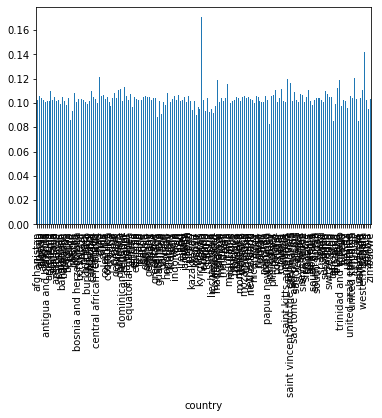

In [13]:
df.groupby('country')['score_fear'].mean().plot.bar()

In [15]:
a = df.groupby('country')['score_fear'].mean()

In [16]:
a

country
afghanistan       0.102668
albania           0.105535
algeria           0.103693
andorra           0.102789
angola            0.101097
                    ...   
vietnam           0.110986
western sahara    0.142140
yemen             0.102377
zambia            0.094621
zimbabwe          0.103541
Name: score_fear, Length: 173, dtype: float64

In [17]:
a = a.to_frame()

In [18]:
a

,score_fear
country,
afghanistan,0.102668
albania,0.105535
algeria,0.103693
andorra,0.102789
angola,0.101097
...,...
vietnam,0.110986
western sahara,0.142140
yemen,0.102377


In [19]:
#countries with highest fear avg
a.nlargest(15,['score_fear'])

,score_fear
country,
latvia,0.170440
western sahara,0.142140
chad,0.120946
uruguay,0.120198
saint kitts and nevis,0.120000
madagascar,0.118924
togo,0.118683
saint vincent and the grenadines,0.116044
malta,0.115434


In [21]:
a.nsmallest(15,['score_fear'])

,score_fear
country,
paraguay,0.082511
tajikistan,0.084906
uzbekistan,0.085526
belize,0.085992
grenada,0.088673
kosovo,0.089977
guinea,0.090909
lithuania,0.091796
libya,0.092643


In [30]:
df_scores = df[['score_fear' , 'score_anticip' , 'score_positive' , 'score_negative' , 'score_surprise', 'score_anger' , 'score_disgust' , 'score_sadness' ,'score_joy' , 'score_trust']]

In [31]:
df_scores

,score_fear,score_anticip,score_positive,score_negative,score_surprise,score_anger,score_disgust,score_sadness,score_joy,score_trust
0,0.081081,0.081081,0.108108,0.108108,0.081081,0.108108,0.108108,0.108108,0.081081,0.135135
1,0.102941,0.102941,0.117647,0.088235,0.102941,0.102941,0.088235,0.088235,0.117647,0.088235
2,0.095238,0.095238,0.119048,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.119048
3,0.120000,0.120000,0.120000,0.120000,0.040000,0.120000,0.120000,0.040000,0.040000,0.160000
4,0.098361,0.106557,0.114754,0.098361,0.098361,0.098361,0.090164,0.090164,0.106557,0.098361
...,...,...,...,...,...,...,...,...,...,...
165111,0.103774,0.084906,0.094340,0.113208,0.094340,0.103774,0.103774,0.103774,0.084906,0.113208
165112,0.114286,0.085714,0.114286,0.114286,0.085714,0.114286,0.085714,0.114286,0.085714,0.085714
165113,0.103896,0.090909,0.103896,0.116883,0.090909,0.103896,0.090909,0.103896,0.090909,0.103896
165114,0.105263,0.105263,0.105263,0.105263,0.105263,0.052632,0.105263,0.052632,0.105263,0.157895


In [32]:
df_scores['Maint sentiment'] = df_scores.idxmax(axis=1)

C:\Users\Kirthika\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_scores

,score_fear,score_anticip,score_positive,score_negative,score_surprise,score_anger,score_disgust,score_sadness,score_joy,score_trust,Maint sentiment
0,0.081081,0.081081,0.108108,0.108108,0.081081,0.108108,0.108108,0.108108,0.081081,0.135135,score_trust
1,0.102941,0.102941,0.117647,0.088235,0.102941,0.102941,0.088235,0.088235,0.117647,0.088235,score_positive
2,0.095238,0.095238,0.119048,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.119048,score_positive
3,0.120000,0.120000,0.120000,0.120000,0.040000,0.120000,0.120000,0.040000,0.040000,0.160000,score_trust
4,0.098361,0.106557,0.114754,0.098361,0.098361,0.098361,0.090164,0.090164,0.106557,0.098361,score_positive
...,...,...,...,...,...,...,...,...,...,...,...
165111,0.103774,0.084906,0.094340,0.113208,0.094340,0.103774,0.103774,0.103774,0.084906,0.113208,score_negative
165112,0.114286,0.085714,0.114286,0.114286,0.085714,0.114286,0.085714,0.114286,0.085714,0.085714,score_fear
165113,0.103896,0.090909,0.103896,0.116883,0.090909,0.103896,0.090909,0.103896,0.090909,0.103896,score_negative
165114,0.105263,0.105263,0.105263,0.105263,0.105263,0.052632,0.105263,0.052632,0.105263,0.157895,score_trust


In [41]:
df_scores[df_scores["Maint sentiment"] == "score_sadness"]

,score_fear,score_anticip,score_positive,score_negative,score_surprise,score_anger,score_disgust,score_sadness,score_joy,score_trust,Maint sentiment
633,0.093750,0.093750,0.093750,0.093750,0.093750,0.093750,0.093750,0.125000,0.093750,0.125000,score_sadness
1266,0.107143,0.089286,0.107143,0.107143,0.089286,0.089286,0.089286,0.125000,0.089286,0.107143,score_sadness
5352,0.112903,0.080645,0.096774,0.112903,0.080645,0.096774,0.112903,0.129032,0.096774,0.080645,score_sadness
9035,0.092593,0.092593,0.111111,0.111111,0.092593,0.092593,0.092593,0.129630,0.092593,0.092593,score_sadness
13233,0.075000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.125000,0.100000,0.100000,score_sadness
...,...,...,...,...,...,...,...,...,...,...,...
161595,0.085106,0.085106,0.106383,0.106383,0.106383,0.106383,0.106383,0.127660,0.063830,0.106383,score_sadness
162233,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.129032,0.096774,0.096774,score_sadness
162507,0.097015,0.104478,0.104478,0.104478,0.097015,0.089552,0.097015,0.111940,0.089552,0.104478,score_sadness
162886,0.097561,0.097561,0.097561,0.097561,0.097561,0.097561,0.097561,0.109756,0.097561,0.109756,score_sadness


In [46]:
df = pd.concat([df, df_scores], axis=1)

In [85]:
def giveday(timestamp):
    day_string = timestamp.day

In [86]:
df['timestamp'] = pd.to_datetime(df['Date'])
df["monthName"] = df.timestamp.dt.month_name()
df['day'] = df.timestamp.dt.day

In [87]:
df_fear = df[df["Maint sentiment"] == 'score_fear']
df_trust = df[df["Maint sentiment"] == 'score_trust']
#df_fear = df_fear[df_fear["month" , "Maint sentiment"]]


Text(0.5, 1.0, '% of trust tweets by Month')

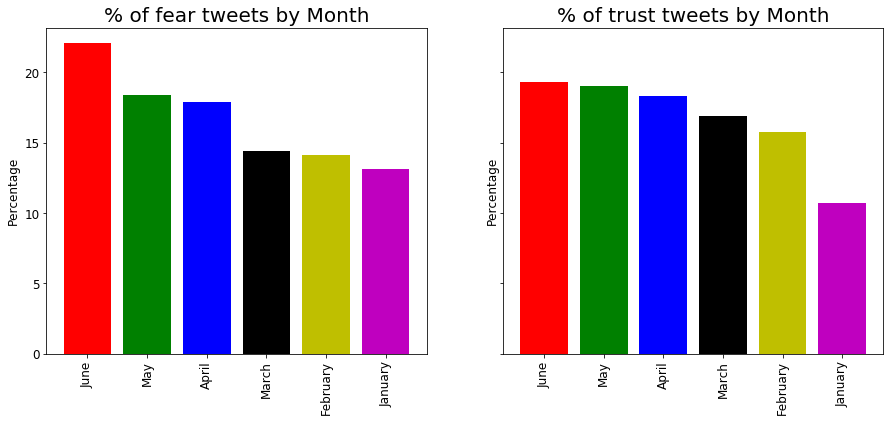

In [88]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = df_fear["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month')

data = df_trust["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month')



In [103]:
fear = pd.DataFrame({'Timestamp': df_fear.timestamp, 'Category': df_fear['Maint sentiment']})

In [106]:
fear

,Timestamp,Category,Week/Year
7,2020-01-12,score_fear,2/2020
8,2020-01-30,score_fear,5/2020
12,2020-01-23,score_fear,4/2020
25,2020-01-30,score_fear,5/2020
32,2020-01-30,score_fear,5/2020
...,...,...,...
165106,2020-06-19,score_fear,25/2020
165107,2020-06-19,score_fear,25/2020
165110,2020-06-19,score_fear,25/2020
165112,2020-06-19,score_fear,25/2020


In [105]:
fear

,Timestamp,Category,Week/Year
7,2020-01-12,score_fear,2/2020
8,2020-01-30,score_fear,5/2020
12,2020-01-23,score_fear,4/2020
25,2020-01-30,score_fear,5/2020
32,2020-01-30,score_fear,5/2020
...,...,...,...
165106,2020-06-19,score_fear,25/2020
165107,2020-06-19,score_fear,25/2020
165110,2020-06-19,score_fear,25/2020
165112,2020-06-19,score_fear,25/2020


In [115]:
df1 = df

In [116]:
df1.rename(columns = {"Maint sentiment" : "main_emotion"} , inplace = True)

In [117]:
df1

,Tweets,Date,country,compound,Sentiment,month,Country/Region,anticip,positive,negative,...,score_surprise,score_anger,score_disgust,score_sadness,score_joy,score_trust,main_emotion,timestamp,monthName,day
0,These chinese people on campus are so consider...,2020-01-28,afghanistan,0.5777,positive,1,Afghanistan,3.0,4.0,4.0,...,0.081081,0.108108,0.108108,0.108108,0.081081,0.135135,score_trust,2020-01-28,January,28
1,So the first month of the new decade went some...,2020-01-30,albania,0.2732,positive,1,Albania,7.0,8.0,6.0,...,0.102941,0.102941,0.088235,0.088235,0.117647,0.088235,score_positive,2020-01-30,January,30
2,Coronavirus sounds nice and all but I'm actual...,2020-01-30,albania,0.2263,positive,1,Albania,4.0,5.0,4.0,...,0.095238,0.095238,0.095238,0.095238,0.095238,0.119048,score_positive,2020-01-30,January,30
3,Also a good compendium of information on #nCoV...,2020-01-22,albania,0.4404,positive,1,Albania,3.0,3.0,3.0,...,0.040000,0.120000,0.120000,0.040000,0.040000,0.160000,score_trust,2020-01-22,January,22
4,OMG I WAS JUST\r\n\r\nearlier today I was expl...,2020-01-21,albania,0.9042,positive,1,Albania,13.0,14.0,12.0,...,0.098361,0.098361,0.090164,0.090164,0.106557,0.098361,score_positive,2020-01-21,January,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165111,"One, so you're saying people only have the rig...",2020-06-19,us,0.4490,positive,6,US,9.0,10.0,12.0,...,0.094340,0.103774,0.103774,0.103774,0.084906,0.113208,score_negative,2020-06-19,June,19
165112,Kolkata Private hospitals face shortage of bed...,2020-06-19,india,-0.1372,negative,6,India,3.0,4.0,4.0,...,0.085714,0.114286,0.085714,0.114286,0.085714,0.085714,score_fear,2020-06-19,June,19
165113,Reminder: Drive-thru testing is offered at the...,2020-06-19,us,0.5106,positive,6,US,7.0,8.0,9.0,...,0.090909,0.103896,0.090909,0.103896,0.090909,0.103896,score_negative,2020-06-19,June,19
165114,All Trump supporters should be excited to atte...,2020-06-19,us,0.6486,positive,6,US,2.0,2.0,2.0,...,0.105263,0.052632,0.105263,0.052632,0.105263,0.157895,score_trust,2020-06-19,June,19


In [149]:
by_day_sentiment = df1.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')

In [150]:
by_day_sentiment=by_day_sentiment.fillna(0)

In [151]:
#by_day_sentiment['total']=by_day_sentiment['score_anger']+by_day_sentiment['score_anticip']+by_day_sentiment['score_disgust']  +by_day_sentiment['score_fear'] +by_day_sentiment['score_joy'] +by_day_sentiment['score_sadness']+by_day_sentiment['score_surprise']+by_day_sentiment['score_trust']
by_day_sentiment['total']=by_day_sentiment['score_fear']+by_day_sentiment['score_trust']

In [152]:
by_day_sentiment['fear']=by_day_sentiment['score_fear']/by_day_sentiment['total']
by_day_sentiment['trust']=by_day_sentiment['score_trust']/by_day_sentiment['total']
#by_day_sentiment['joy']=by_day_sentiment['score_joy']/by_day_sentiment['total']
#by_day_sentiment['anger']=by_day_sentiment['score_anger']/by_day_sentiment['total']
#by_day_sentiment['anticip']=by_day_sentiment['score_anticip']/by_day_sentiment['total']
#by_day_sentiment['disgust']=by_day_sentiment['score_disgust']/by_day_sentiment['total']
#by_day_sentiment['sadness']=by_day_sentiment['score_sadness']/by_day_sentiment['total']
#by_day_sentiment['surprise']=by_day_sentiment['score_surprise']/by_day_sentiment['total']

In [153]:
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_fear'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_trust'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_joy'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_anger'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_anticip'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_disgust'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_sadness'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_surprise'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_positive'], axis=1)
by_day_sentiment=by_day_sentiment.drop(['score_negative'], axis=1)

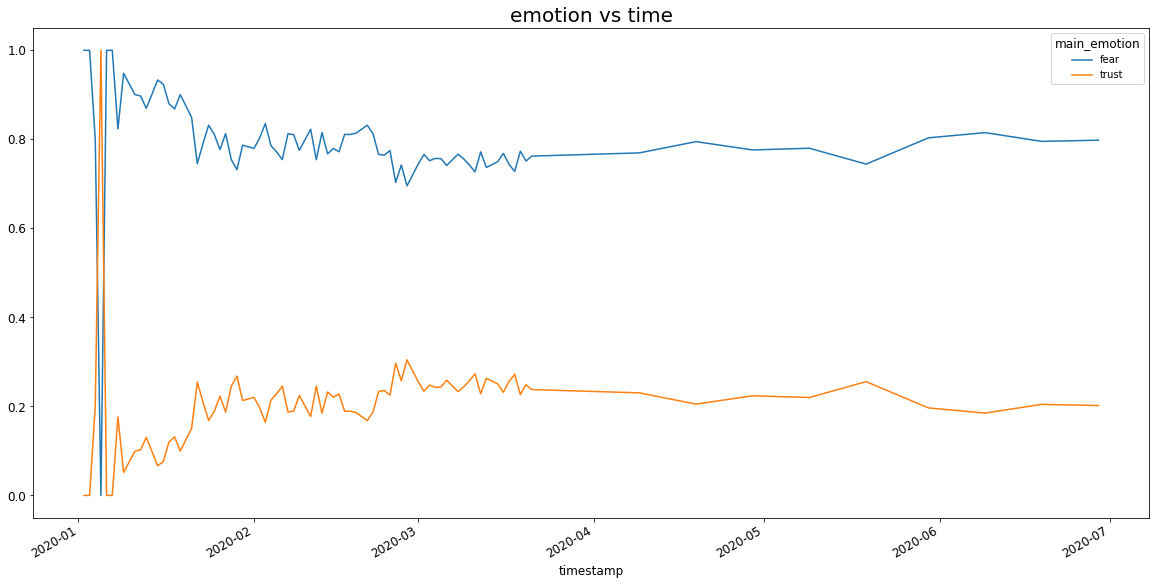

In [154]:
by_day_sentiment.plot(title='emotion vs time',figsize=(20, 10))

In [184]:
df_US=df[df.country=='us']
df_india=df[df.country=='india']
df_brazil=df[df.country=='brazil']
df_vietnam=df[df.country=='vietnam']
df_sk=df[df.country=='south korea']
df_china=df[df.country=='china']

Text(0.5, 1.0, '% of trust tweets by Month in US')

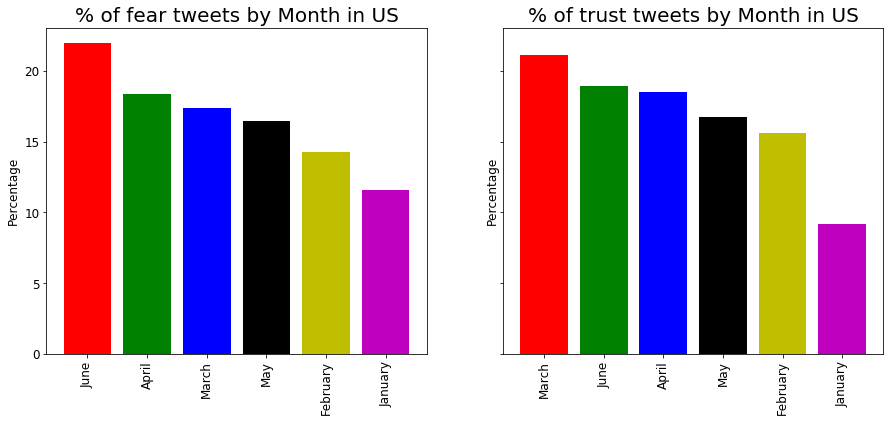

In [155]:
#worst hit
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_us=df_US[df_US["main_emotion"] == "score_fear"]
data = df_fear_us["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in US')

df_trust_us=df_US[df_US["main_emotion"] == "score_trust"]
data = df_trust_us["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in US')

In [156]:
by_day_sentiment_US = df_US.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_US=by_day_sentiment_US.fillna(0)
by_day_sentiment_US['total']=by_day_sentiment_US['score_fear']  +by_day_sentiment_US['score_trust']
by_day_sentiment_US['fear']=by_day_sentiment_US['score_fear']/by_day_sentiment_US['total']
by_day_sentiment_US['trust']=by_day_sentiment_US['score_trust']/by_day_sentiment_US['total']

In [157]:
by_day_sentiment_US=by_day_sentiment_US.drop(['total'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_fear'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_trust'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_joy'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_anger'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_anticip'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_disgust'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_sadness'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_surprise'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_positive'], axis=1)
by_day_sentiment_US=by_day_sentiment_US.drop(['score_negative'], axis=1)

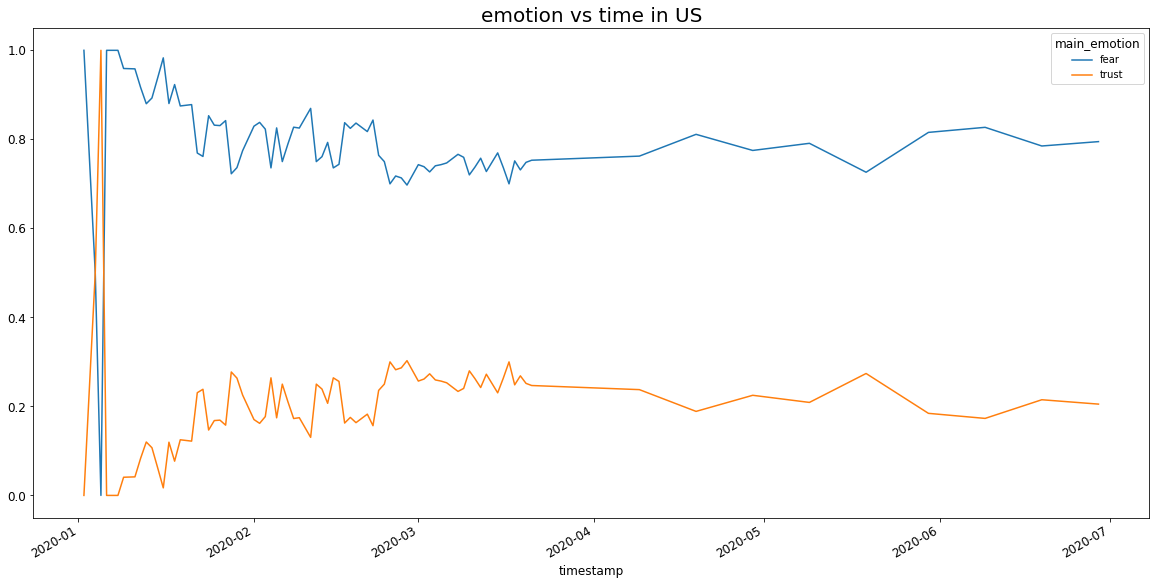

In [158]:
by_day_sentiment_US.plot(title='emotion vs time in US',figsize=(20, 10))

Text(0.5, 1.0, '% of trust tweets by Month in India')

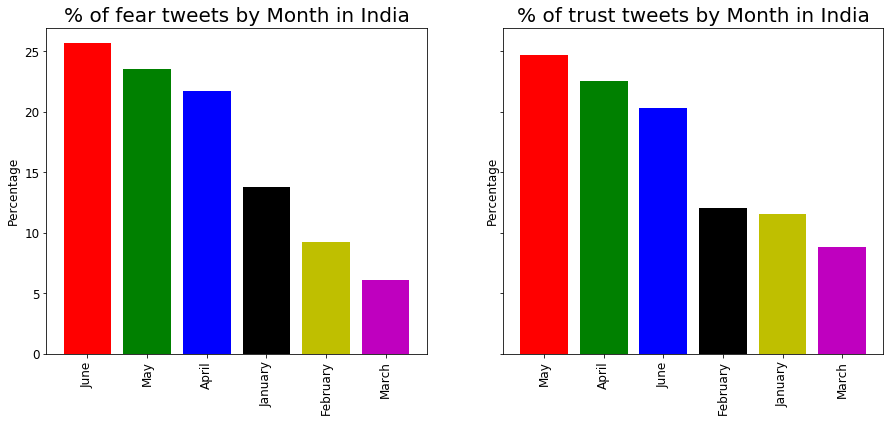

In [159]:
#worst hit
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_india=df_india[df_india["main_emotion"] == "score_fear"]
data = df_fear_india["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in India')

df_trust_india=df_india[df_india["main_emotion"] == "score_trust"]
data = df_trust_india["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in India')

In [160]:
by_day_sentiment_india = df_india.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_india=by_day_sentiment_india.fillna(0)
by_day_sentiment_india['total']=by_day_sentiment_india['score_fear']  +by_day_sentiment_india['score_trust']
by_day_sentiment_india['fear']=by_day_sentiment_india['score_fear']/by_day_sentiment_india['total']
by_day_sentiment_india['trust']=by_day_sentiment_india['score_trust']/by_day_sentiment_india['total']

by_day_sentiment_india=by_day_sentiment_india.drop(['total'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_fear'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_trust'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_joy'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_anger'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_anticip'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_disgust'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_sadness'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_surprise'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_positive'], axis=1)
by_day_sentiment_india=by_day_sentiment_india.drop(['score_negative'], axis=1)

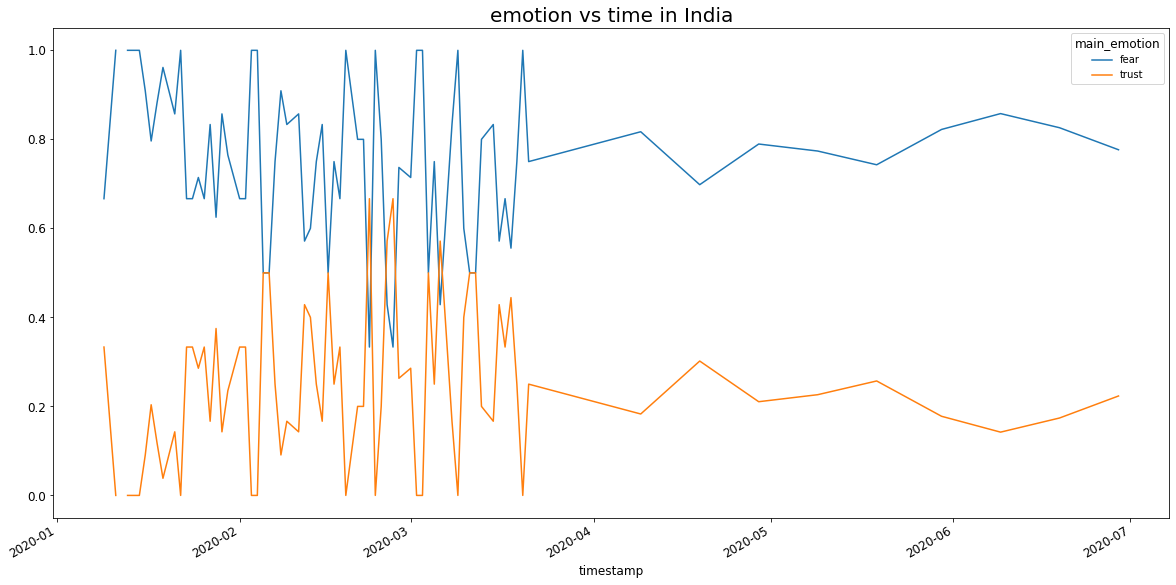

In [162]:
by_day_sentiment_india.plot(title='emotion vs time in India',figsize=(20, 10))

Text(0.5, 1.0, '% of trust tweets by Month in Brazil')

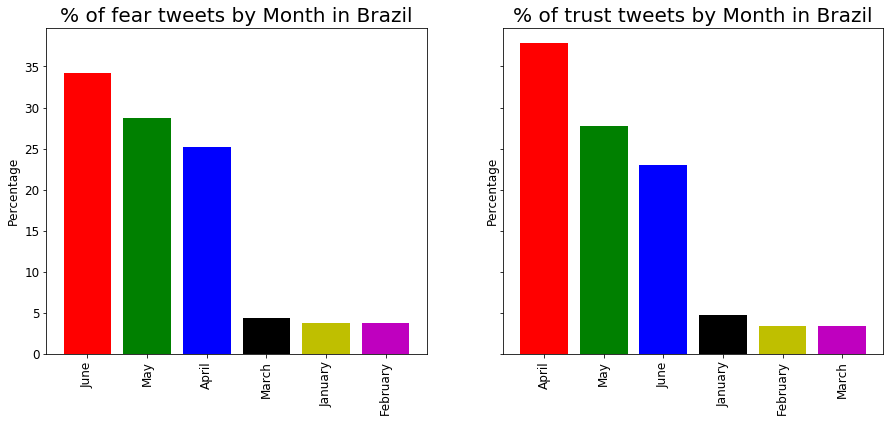

In [180]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_brazil=df_brazil[df_brazil["main_emotion"] == "score_fear"]
data = df_fear_brazil["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in Brazil')

df_trust_brazil=df_brazil[df_brazil["main_emotion"] == "score_trust"]
data = df_trust_brazil["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in Brazil')

In [182]:
by_day_sentiment_brazil = df_brazil.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_brazil=by_day_sentiment_brazil.fillna(0)
by_day_sentiment_brazil['total']=by_day_sentiment_brazil['score_fear']  +by_day_sentiment_brazil['score_trust']
by_day_sentiment_brazil['fear']=by_day_sentiment_brazil['score_fear']/by_day_sentiment_brazil['total']
by_day_sentiment_brazil['trust']=by_day_sentiment_brazil['score_trust']/by_day_sentiment_brazil['total']

by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['total'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_fear'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_trust'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_joy'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_anger'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_anticip'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_disgust'], axis=1)
#by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_sadness'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_surprise'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_positive'], axis=1)
by_day_sentiment_brazil=by_day_sentiment_brazil.drop(['score_negative'], axis=1)

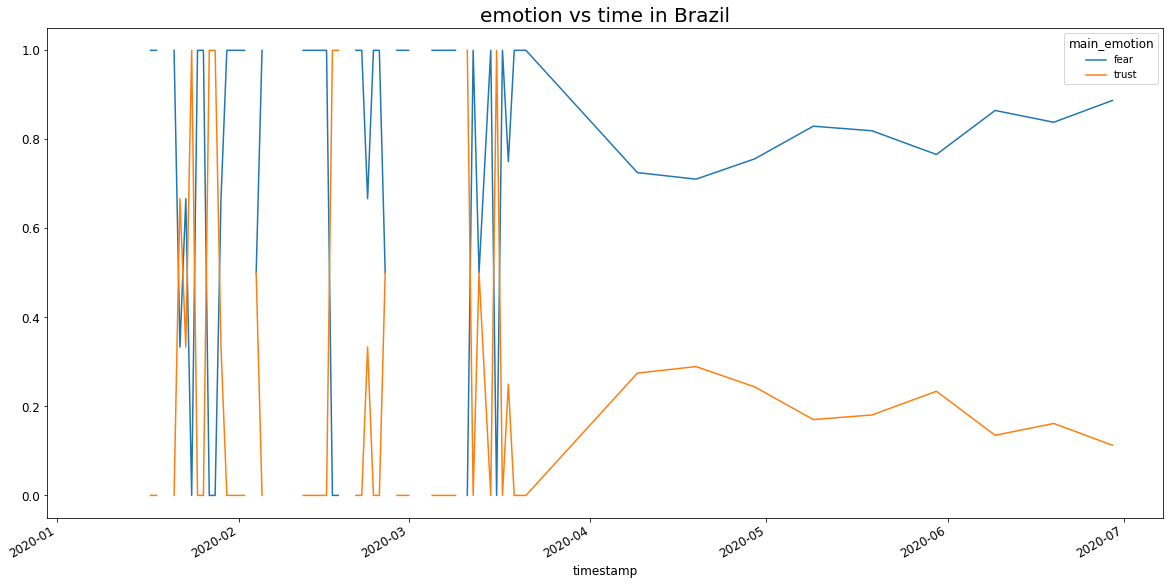

In [183]:
by_day_sentiment_brazil.plot(title='emotion vs time in Brazil',figsize=(20, 10))

Text(0.5, 1.0, '% of trust tweets by Month in Vietnam')

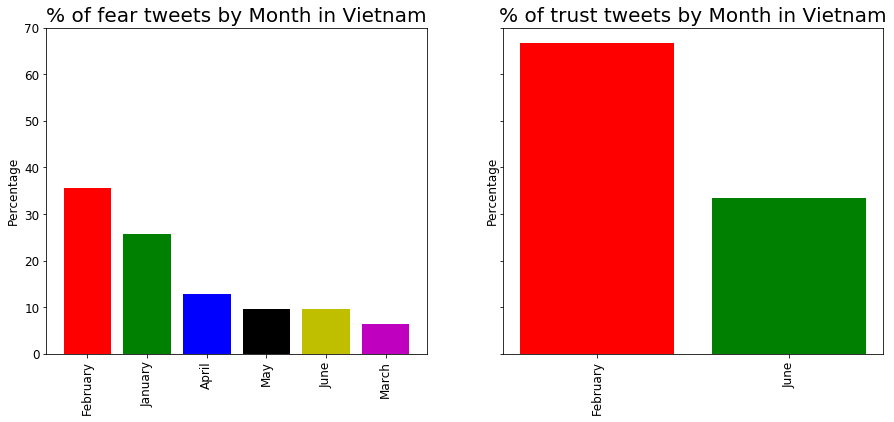

In [169]:
#least hit
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_vietnam=df_vietnam[df_vietnam["main_emotion"] == "score_fear"]
data = df_fear_vietnam["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in Vietnam')

df_trust_vietnam=df_vietnam[df_vietnam["main_emotion"] == "score_trust"]
data = df_trust_vietnam["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in Vietnam')

In [177]:
by_day_sentiment_vietnam = df_vietnam.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_vietnam=by_day_sentiment_vietnam.fillna(0)
by_day_sentiment_vietnam['total']=by_day_sentiment_vietnam['score_fear']  +by_day_sentiment_vietnam['score_trust']
by_day_sentiment_vietnam['fear']=by_day_sentiment_vietnam['score_fear']/by_day_sentiment_vietnam['total']
by_day_sentiment_vietnam['trust']=by_day_sentiment_vietnam['score_trust']/by_day_sentiment_vietnam['total']

by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['total'], axis=1)
by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_fear'], axis=1)
by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_trust'], axis=1)
#by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_joy'], axis=1)
#by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_anger'], axis=1)
by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_anticip'], axis=1)
#by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_disgust'], axis=1)
#by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_sadness'], axis=1)
#by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_surprise'], axis=1)
by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_positive'], axis=1)
by_day_sentiment_vietnam=by_day_sentiment_vietnam.drop(['score_negative'], axis=1)

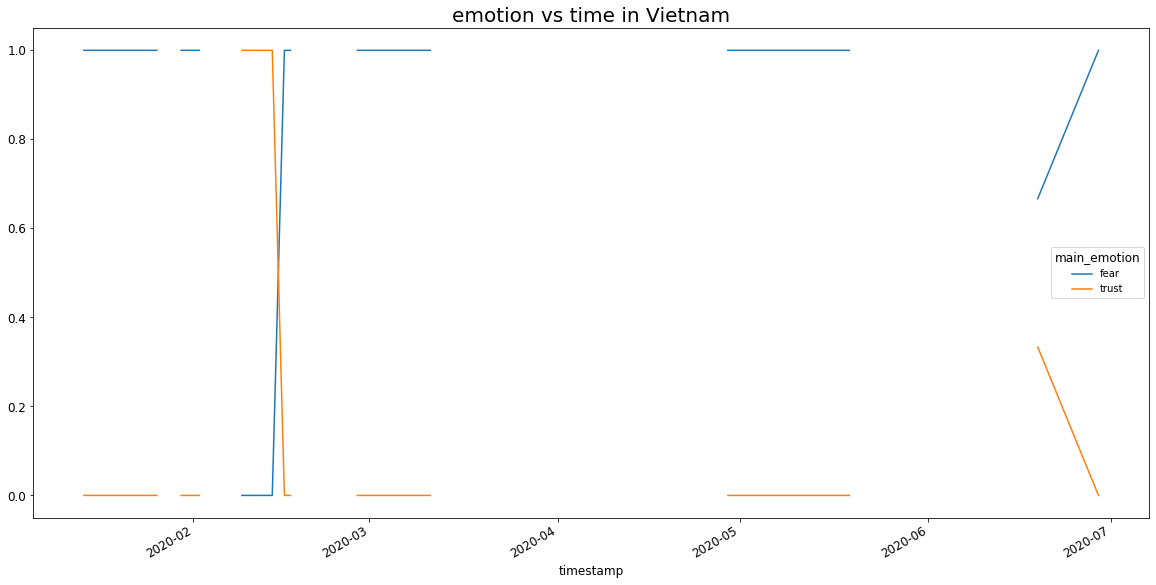

In [178]:
by_day_sentiment_vietnam.plot(title='emotion vs time in Vietnam',figsize=(20, 10))

Text(0.5, 1.0, '% of trust tweets by Month in South Korea')

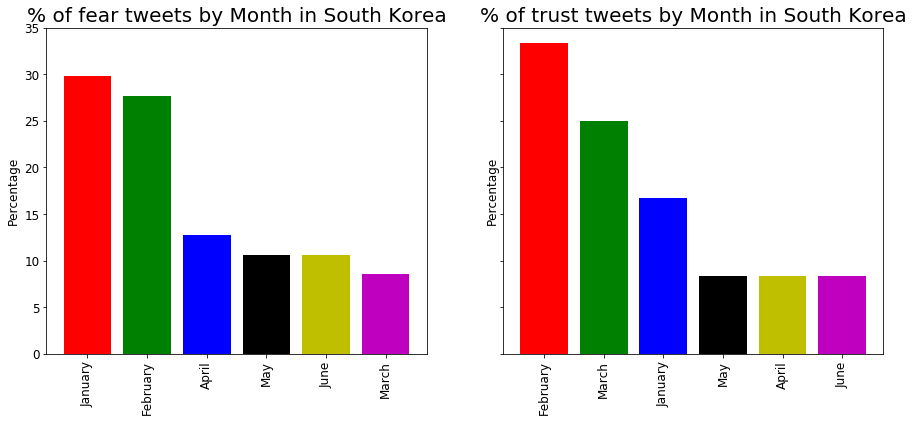

In [186]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_sk=df_sk[df_sk["main_emotion"] == "score_fear"]
data = df_fear_sk["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in South Korea')

df_trust_sk=df_sk[df_sk["main_emotion"] == "score_trust"]
data = df_trust_sk["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in South Korea')

In [191]:
by_day_sentiment_sk = df_sk.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_sk=by_day_sentiment_sk.fillna(0)
by_day_sentiment_sk['total']=by_day_sentiment_sk['score_fear']  +by_day_sentiment_sk['score_trust']
by_day_sentiment_sk['fear']=by_day_sentiment_sk['score_fear']/by_day_sentiment_sk['total']
by_day_sentiment_sk['trust']=by_day_sentiment_sk['score_trust']/by_day_sentiment_sk['total']

by_day_sentiment_sk=by_day_sentiment_sk.drop(['total'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_fear'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_trust'], axis=1)
#by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_joy'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_anger'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_anticip'], axis=1)
#by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_disgust'], axis=1)
#by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_sadness'], axis=1)
#by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_surprise'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_positive'], axis=1)
by_day_sentiment_sk=by_day_sentiment_sk.drop(['score_negative'], axis=1)

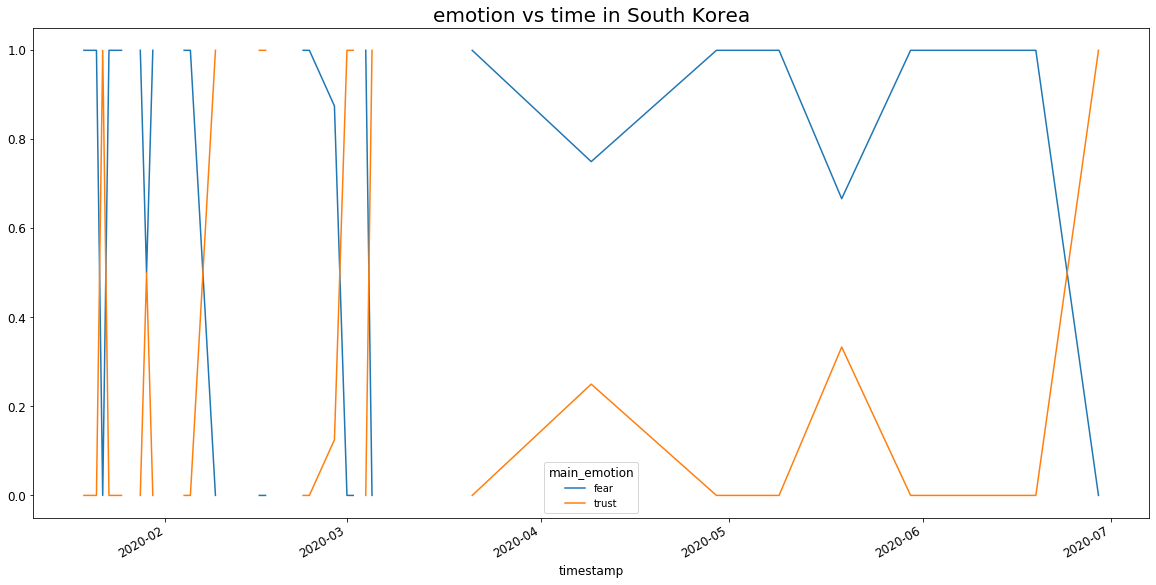

In [192]:
by_day_sentiment_sk.plot(title='emotion vs time in South Korea',figsize=(20, 10))

Text(0.5, 1.0, '% of trust tweets by Month in China')

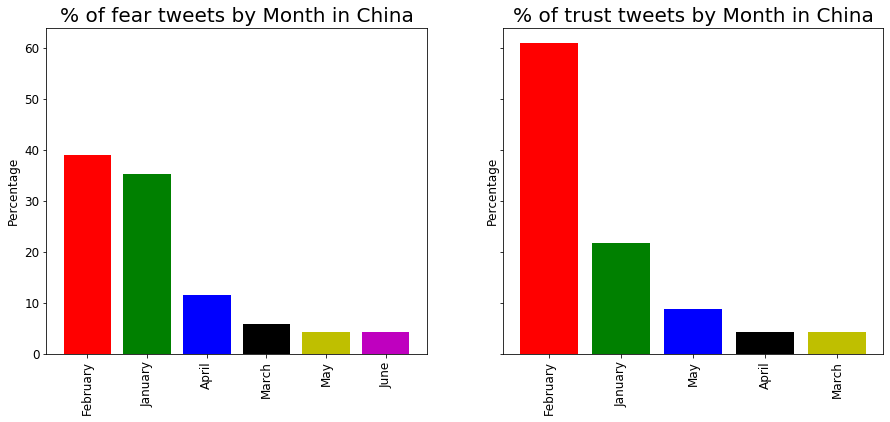

In [193]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_fear_china=df_china[df_china["main_emotion"] == "score_fear"]
data = df_fear_china["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of fear tweets by Month in China')

df_trust_china=df_china[df_china["main_emotion"] == "score_trust"]
data = df_trust_china["monthName"].value_counts(normalize=True)

axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_ylabel('Percentage')
axes2.set_title('% of trust tweets by Month in China')

In [196]:
by_day_sentiment_china = df_china.groupby([pd.Grouper(key='timestamp', freq='D'), 'main_emotion']) \
    .size().unstack('main_emotion')
by_day_sentiment_china=by_day_sentiment_china.fillna(0)
by_day_sentiment_china['total']=by_day_sentiment_china['score_fear']  +by_day_sentiment_china['score_trust']
by_day_sentiment_china['fear']=by_day_sentiment_china['score_fear']/by_day_sentiment_china['total']
by_day_sentiment_china['trust']=by_day_sentiment_china['score_trust']/by_day_sentiment_china['total']

by_day_sentiment_china=by_day_sentiment_china.drop(['total'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_fear'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_trust'], axis=1)
#by_day_sentiment_china=by_day_sentiment_china.drop(['score_joy'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_anger'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_anticip'], axis=1)
#by_day_sentiment_china=by_day_sentiment_china.drop(['score_disgust'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_sadness'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_surprise'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_positive'], axis=1)
by_day_sentiment_china=by_day_sentiment_china.drop(['score_negative'], axis=1)

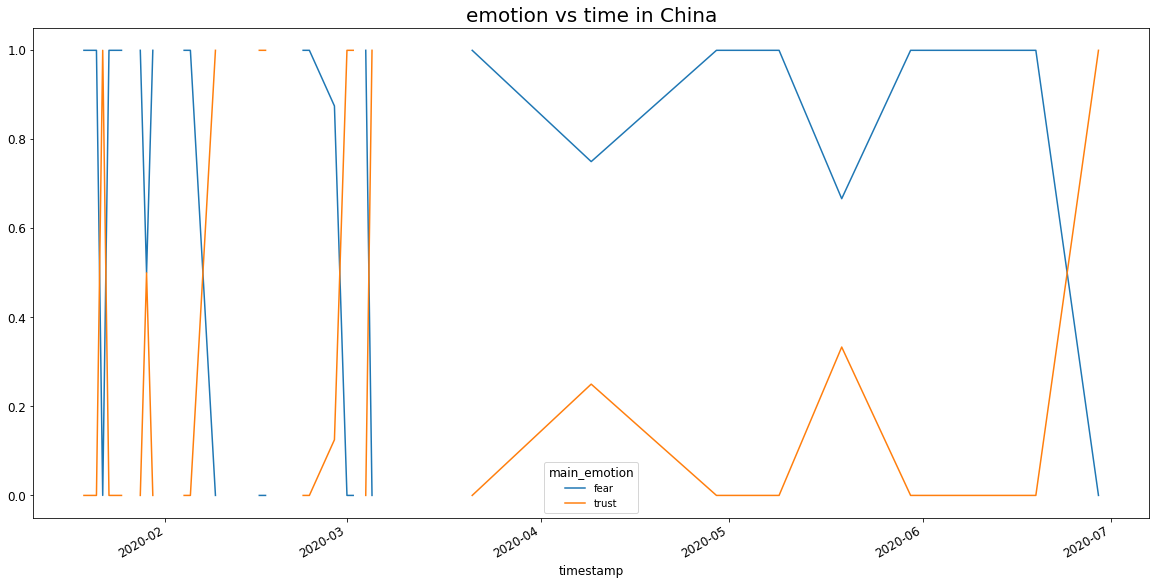

In [197]:
by_day_sentiment_sk.plot(title='emotion vs time in China',figsize=(20, 10))